In [ ]:
# This library is used for data manipulation and analysis.
import pandas as pd
# This library is used for numerical computing
import numpy as np
# For splitting data into training and testing sets
from sklearn.model_selection import train_test_split
# This library is used for encoding categorical variables
from sklearn.preprocessing import LabelEncoder
# This library is used for evaluating model accuracy
from sklearn.metrics import accuracy_score
# This library is used for creating a sequential neural network model
from tensorflow.keras.models import Sequential
 # This library is used for to import different layers for building neural networks
from tensorflow.keras.layers import Dense, Flatten, Conv1D, MaxPooling1D, Dropout
# This library is used for data visualization
import matplotlib.pyplot as plt
# This library is used for generating classification metrics report
from sklearn.metrics import classification_report
# This library is used for standardizing features by removing the mean and scaling to unit variance
from sklearn.preprocessing import StandardScaler
# This library is used for Principal Component Analysis, a dimensionality reduction technique
from sklearn.decomposition import PCA
# Importing LabelBinarizer from sklearn.preprocessing for binarizing labels in multi-class classification tasks
from sklearn.preprocessing import LabelBinarizer
# Importing roc_curve, auc, and roc_auc_score from sklearn.metrics for computing Receiver Operating Characteristic (ROC) curve metrics
from sklearn.metrics import roc_curve, auc, roc_auc_score

In [ ]:
# Load the dataset for analysis.
kdd_data = pd.read_csv("/content/drive/MyDrive/AI-Based IDS project FYP/KDD code and dataset/KDD_CUP_99_dataset.csv")

In [ ]:
#Importing snippet of a dataset.
kdd_data.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,count,srv_count,serror_rate,srv_serror_rate,...,srv_rerror_rate,same_srv_rate,diff_srv_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,label
0,0,1,22,9,181,5450,8,8,0.0,0.0,...,0.0,1.0,0.0,9,9,1.0,0.0,0.11,0.0,normal
1,0,1,22,9,239,486,8,8,0.0,0.0,...,0.0,1.0,0.0,19,19,1.0,0.0,0.05,0.0,normal
2,0,1,22,9,235,1337,8,8,0.0,0.0,...,0.0,1.0,0.0,29,29,1.0,0.0,0.03,0.0,normal
3,0,1,22,9,219,1337,6,6,0.0,0.0,...,0.0,1.0,0.0,39,39,1.0,0.0,0.03,0.0,normal
4,0,1,22,9,217,2032,6,6,0.0,0.0,...,0.0,1.0,0.0,49,49,1.0,0.0,0.02,0.0,normal


In [ ]:
#Display a total number of different types of attacks.
kdd_data.value_counts('label')

label
smurf              280790
neptune            107201
normal              97277
back                 2203
satan                1589
ipsweep              1247
portsweep            1040
warezclient          1020
teardrop              979
pod                   264
nmap                  231
guess_passwd           53
buffer_overflow        30
land                   21
warezmaster            20
imap                   12
rootkit                10
loadmodule              9
ftp_write               8
multihop                7
phf                     4
perl                    3
spy                     2
dtype: int64

In [ ]:
# Label encode categorical columns before performing PCA.
label_encoder = LabelEncoder()
kdd_data['protocol_type'] = label_encoder.fit_transform(kdd_data['protocol_type'])
kdd_data['service'] = label_encoder.fit_transform(kdd_data['service'])
kdd_data['flag'] = label_encoder.fit_transform(kdd_data['flag'])

In [ ]:
# Exclude 'Label' column from features
features = kdd_data.drop(['label'], axis=1)

# Standardize features (important for PCA)
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

#Credits: https://www.geeksforgeeks.org/principal-component-analysis-with-python/
# Initialize PCA with desired number of components
n_components = 20  # Choose the number of principal components
pca = PCA(n_components=n_components)

# Fit PCA on scaled features
pca.fit(scaled_features)

PCA(n_components=20)

In [ ]:
# Get transformed data (principal components)
transformed_data = pca.transform(scaled_features)

In [ ]:
# Separate predictors (features) and the target (label)
X = transformed_data
y = kdd_data['label']

# Convert label column to numerical values using LabelEncoder.
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# Splitting the data into training and testing sets.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Reshape data for CNN input (assuming 1D CNN)
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1],1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1],1)

In [ ]:
#Credits: Machine learning, https://www.tensorflow.org/api_docs/python/tf/keras/layers/Conv1D module and https://chat.openai.com
# Define the CNN model with additional layers
model = Sequential()

# This is the first or input layer of the model which is convolutional layer.
# It has 32 filters and takes input in the shape of (20, 1).
model.add(Conv1D(filters=32, kernel_size=3, activation='relu', input_shape=(20, 1)))

# This layer downsamples the information extracted from the convolutional layer.
model.add(MaxPooling1D(pool_size=2))

# This is another convolutional layer with 64 filters and relu activation function.
model.add(Conv1D(filters=64, kernel_size=3, activation='relu'))

# Another max-pooling layer for downsampling.
model.add(MaxPooling1D(pool_size=2))

# This convolutional layer has 128 filters and relu activation function.
model.add(Conv1D(filters=128, kernel_size=3, activation='relu'))

# This is flatten layer that converts the output from above series of convolutional  layer into 1-D array for further processing.
model.add(Flatten())

# Next comes the series of fully connected dense layers with 256 neurons.
model.add(Dense(256, activation='relu'))

# This layer helps in normalizing the data by dropping specified percentage of neurons for more robust training.
model.add(Dropout(0.5))

# Another dense layer with 128 neurons.
model.add(Dense(128, activation='relu'))

# This dense layer is the final or output layer of the model which uses number of attack types as the number of neurons,
# and uses softmax as activation function to normalize the output into probabilities.
model.add(Dense(len(label_encoder.classes_), activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 18, 32)            128       
                                                                 
 max_pooling1d (MaxPooling1  (None, 9, 32)             0         
 D)                                                              
                                                                 
 conv1d_1 (Conv1D)           (None, 7, 64)             6208      
                                                                 
 max_pooling1d_1 (MaxPoolin  (None, 3, 64)             0         
 g1D)                                                            
                                                                 
 conv1d_2 (Conv1D)           (None, 1, 128)            24704     
                                                                 
 flatten (Flatten)           (None, 128)               0

In [ ]:
# Compile the model.
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
# Train the model for 5 epochs.
history = model.fit(X_train, y_train, epochs=5, batch_size=128, validation_data=(X_test, y_test))

Epoch 1/5
3088/3088 [==============================] - 47s 15ms/step - loss: 0.0553 - accuracy: 0.9892 - val_loss: 0.0179 - val_accuracy: 0.9939
Epoch 2/5
3088/3088 [==============================] - 41s 13ms/step - loss: 0.0146 - accuracy: 0.9957 - val_loss: 0.0083 - val_accuracy: 0.9975
Epoch 3/5
3088/3088 [==============================] - 35s 11ms/step - loss: 0.0105 - accuracy: 0.9972 - val_loss: 0.0074 - val_accuracy: 0.9978
Epoch 4/5
3088/3088 [==============================] - 35s 11ms/step - loss: 0.0091 - accuracy: 0.9974 - val_loss: 0.0074 - val_accuracy: 0.9977
Epoch 5/5
3088/3088 [==============================] - 32s 10ms/step - loss: 0.0080 - accuracy: 0.9978 - val_loss: 0.0069 - val_accuracy: 0.9980


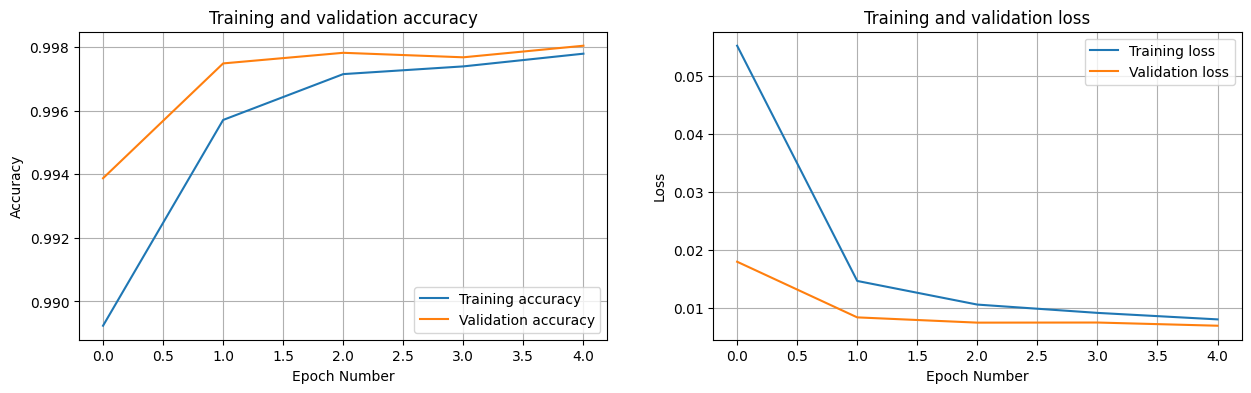

In [ ]:
#Credits: Machine learning module.
#Now we visualize the accuracy and validation loss for the training dataset.
#Create the figure of size 15,4.
fig = plt.figure(figsize=(15,4))

#The 121 subplot says there has to be 1 row, 2 column and the current subplot being added to the first one.
fig.add_subplot(121)
#Now create the graph for training accuracy vs validation accuracy.
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
#Create legend, title, grid, and labels for the axes.
plt.legend(['Training accuracy', 'Validation accuracy'])
plt.title('Training and validation accuracy')
plt.grid()
plt.xlabel('Epoch Number')
plt.ylabel('Accuracy')

#The 122 subplot says there has to be 1 row, 2 column and the current subplot being added to the second one.
fig.add_subplot(122)
#Now create the graph for the training loss and validation loss.
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
#Create legend, title, grid, and labels for the axes.
plt.legend(['Training loss', 'Validation loss'])
plt.title('Training and validation loss')
plt.grid()
plt.xlabel('Epoch Number')
plt.ylabel('Loss')
plt.show()

In [ ]:
#Credits: Machine learning module.
#Now we evaluate the model accuracy and loss for traning and test data.
#Here 'verbose' is a parameter used to control the amount of information displayed during training or evalution
#of the model. Here in this classification model it allows you to see the progess of the evalution process for
#both the training and testing datasets.
train_loss , train_acc = model.evaluate(X_train,  y_train, verbose=2)
test_loss, test_acc = model.evaluate(X_test,  y_test, verbose=2)
print('Classification accuracy on training set: ', train_acc)
print('Classification accuracy on test set: ', test_acc)

12351/12351 - 26s - loss: 0.0056 - accuracy: 0.9982 - 26s/epoch - 2ms/step
3088/3088 - 6s - loss: 0.0069 - accuracy: 0.9980 - 6s/epoch - 2ms/step
Classification accuracy on training set:  0.9981655478477478
Classification accuracy on test set:  0.9980466365814209


In [ ]:
#Predict using the test images with the model.
y_pred = np.argmax(model.predict(X_test), axis=-1)

#Credits: https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html
#Here we generate the classification report with precision, recall, f1-score, and support along with the accuracy.
#Precision: It is number of instances classified positive are actually positive.
#Recall: It tells us how many actually postive were correctly predicted.
#F1 score: It is harmonic mean of precision and recall. It is a good way to show that model has good balance between precision and recall.
#Support: It tells us number of actual instances.
#Accuracy: It is overall correctly predicted instances out of the total instances.
#Macro avg: It's the average of the evaluation metrics for each class, giving equal weight to each class.
#Weighted avg: It's the weighted average of the evaluation metrics for each class, considering the support for each class as its weight.
#It is useful when there's an imbalance in class distribution.
report = classification_report(y_test, y_pred)
print(report)

3088/3088 [==============================] - 6s 2ms/step
              precision    recall  f1-score   support

           0       1.00      0.99      0.99       431
           1       0.00      0.00      0.00        11
           2       0.00      0.00      0.00         1
           3       1.00      0.88      0.93         8
           4       0.00      0.00      0.00         3
           5       0.94      0.91      0.92       263
           6       0.00      0.00      0.00         3
           7       0.00      0.00      0.00         2
           8       0.00      0.00      0.00         1
           9       1.00      1.00      1.00     21408
          10       0.64      0.96      0.77        45
          11       1.00      1.00      1.00     19366
          12       0.00      0.00      0.00         1
          14       0.64      0.68      0.66        41
          15       0.98      0.99      0.99       221
          16       0.00      0.00      0.00         1
          17       1.00 

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
#Credits: https://stackoverflow.com/questions/66635552/keras-assessing-the-roc-auc-of-multiclass-cnn
#Using the trained model predict the class probabilities for the X_train.
y_predicted = model.predict(X_train)
#Using argmax select the class with highest probabilityand convert predicted class probabilites into class labels.
y_predicted = y_predicted.argmax(axis=-1)
print(y_predicted.shape)

12351/12351 [==============================] - 23s 2ms/step
(395216,)


ROC AUC score: 0.7741796296568628


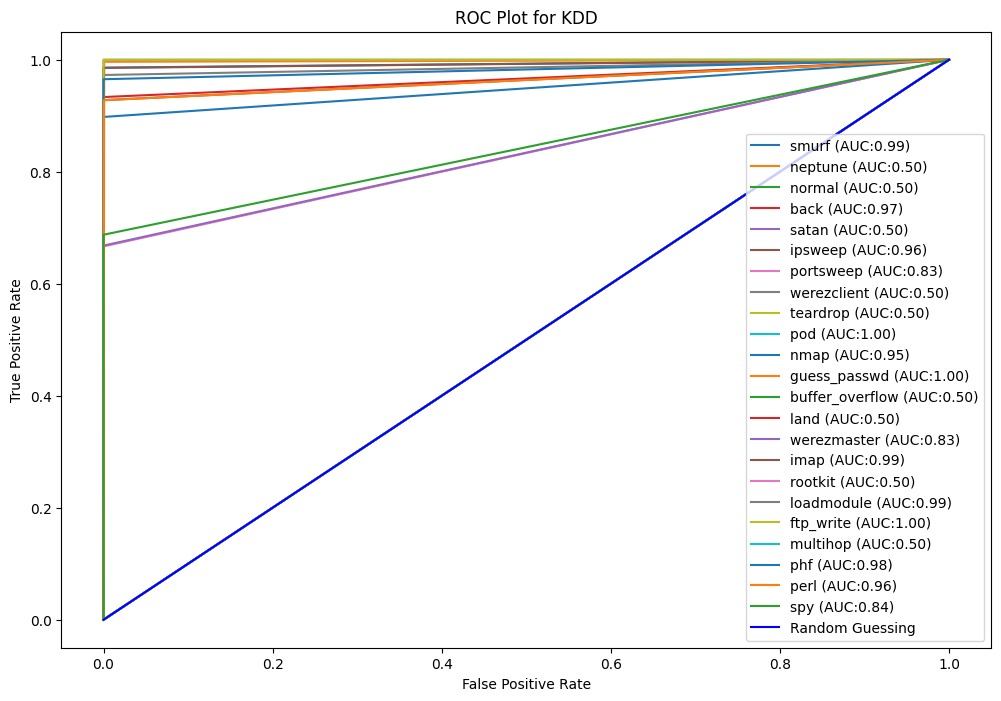

In [ ]:
#Credits: https://stackoverflow.com/questions/66635552/keras-assessing-the-roc-auc-of-multiclass-cnn

#Select the target attacks to evaluate.
target= ['smurf', 'neptune', 'normal', 'back', 'satan', 'ipsweep','portsweep', 'werezclient','teardrop','pod', 'nmap', 'guess_passwd', 'buffer_overflow', 'land', 'werezmaster', 'imap', 'rootkit', 'loadmodule','ftp_write', 'multihop','phf', 'perl', 'spy']

# Set plot figure size.
fig, c_ax = plt.subplots(1,1, figsize = (12, 8))

# The below function is for scoring roc auc score for multi-class classification.
def multiclass_roc_auc_score(y_test, y_pred, average="macro"):
    #This will create an instance of LabelBinarizer which then can be used to binarize the labels(neccessary for ROC curve).
    lb = LabelBinarizer()
    #Fit the LabelBinarize object to the test labels.
    lb.fit(y_test)
    #Transform test labels into binary representation using transform function form LabelBinarizer.
    y_test = lb.transform(y_test)
    #Transform predicted labels into binary representation using transform function form LabelBinarizer.
    y_pred = lb.transform(y_pred)
    #Initiating loop to compute ROC curves and AUC scores for each class.
    for (idx, c_label) in enumerate(target):
        #Computing flase positive rate(fpr), true positive rate(tpr),and thresholds for the ROC curve of the current class.
        fpr, tpr, thresholds = roc_curve(y_test[:,idx].astype(int), y_pred[:,idx])
        #Plot the ROC curve for the current class on provided axes.
        c_ax.plot(fpr, tpr, label = '%s (AUC:%0.2f)'  % (c_label, auc(fpr, tpr)))
    #Plots diagonal line representing random guessing on the ROC plot.
    c_ax.plot(fpr, fpr, 'b-', label = 'Random Guessing')
    return roc_auc_score(y_test, y_pred, average=average)

#Call the 'multiclass_roc_auc_score' fucntion to calculate ROC AUC score.
print('ROC AUC score:', multiclass_roc_auc_score(y_train, y_predicted))

#Create a legend, title, and set labels for both axes on the ROC plot.
c_ax.legend()
plt.title('ROC Plot for KDD')
c_ax.set_xlabel('False Positive Rate')
c_ax.set_ylabel('True Positive Rate')
plt.show()

In [ ]:
# Extract the random row from the dataset
user_input = X_test[98800]
original_label = y_test[98800]

# Reshape the user input data to match the input shape expected by the model
user_input = user_input.reshape(1, 20, 1)

# Make predictions on the user input data
predictions = model.predict(user_input)

#Credits: https://chat.openai.com
# Interpret the predictions
# Reverse the label encoder used in the previous stage.
predicted_class_index = np.argmax(predictions)
predicted_class = label_encoder.classes_[predicted_class_index]

# Decode the original label.
original_label_decoded = label_encoder.inverse_transform([original_label])[0]

print("Original value:", original_label_decoded)
print("Predicted value:", predicted_class)

1/1 [==============================] - 0s 38ms/step
Original value: neptune
Predicted value: neptune
